Config inicial

In [ ]:
from src.recommender import InteractiveRecommender
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

recommender = InteractiveRecommender("data/usuarios_filmes.csv")
usuarios = recommender.usuarios

Gráfico de distribuição

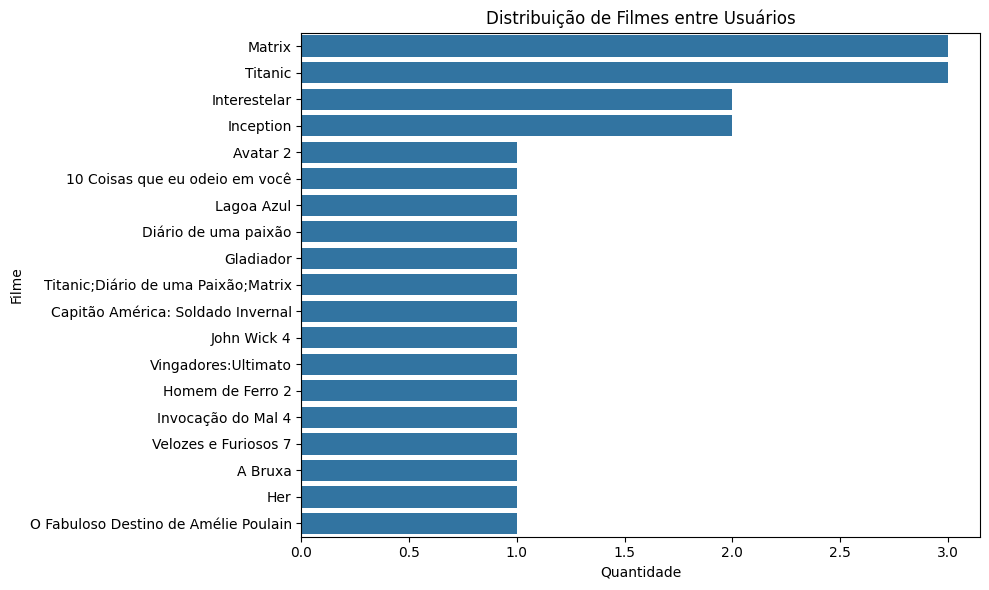

In [2]:
todos_filmes = [filme for u in recommender.usuarios.values() for filme in u["filmes"]]
df_filmes = pd.Series(todos_filmes).value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=df_filmes.values, y=df_filmes.index)
plt.title("Distribuição de Filmes entre Usuários")
plt.xlabel("Quantidade")
plt.ylabel("Filme")
plt.tight_layout()
plt.show()

Matriz de similaridade

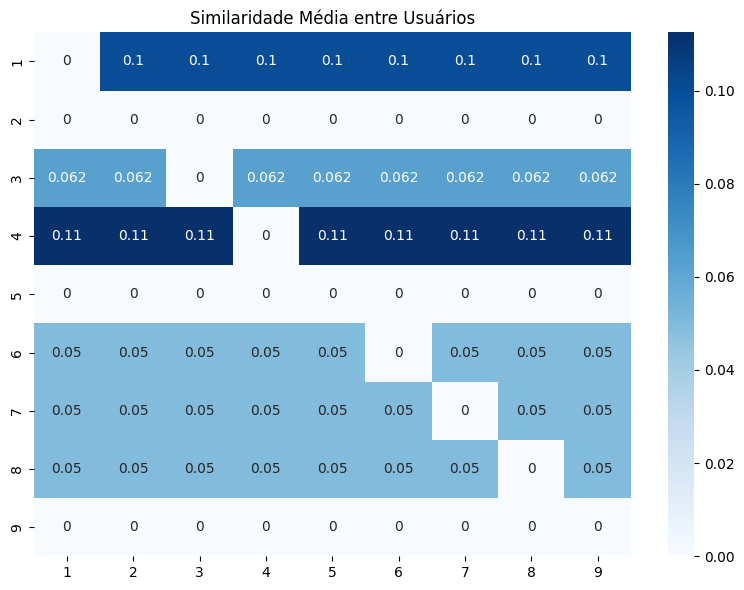

In [3]:
usuarios = list(recommender.usuarios.keys())
matriz = np.zeros((len(usuarios), len(usuarios)))

for i, u1 in enumerate(usuarios):
    for j, u2 in enumerate(usuarios):
        if u1 != u2:
            matriz[i][j] = recommender.media_similaridade(u1)

plt.figure(figsize=(8,6))
sns.heatmap(matriz, xticklabels=usuarios, yticklabels=usuarios, annot=True, cmap="Blues")
plt.title("Similaridade Média entre Usuários")
plt.tight_layout()
plt.show()

Teste de recomendação

In [6]:
user_id = 7  # Escolha um usuário para testar
recs = recommender.recommend_by_similarity(user_id)
print(f"Recomendações para o usuário {user_id} ({recommender.usuarios[user_id]['nome']}):")
print(recs)

Recomendações para o usuário 7 (Paula):
['Invocação do Mal 4', 'Diário de uma paixão', '10 Coisas que eu odeio em você', 'Lagoa Azul', 'Matrix']
